In [113]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

lag 1


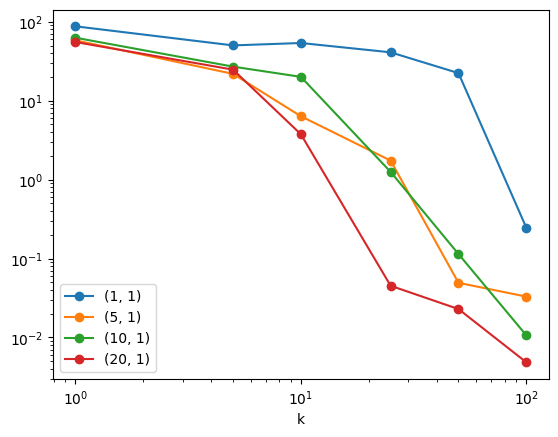

lag 5


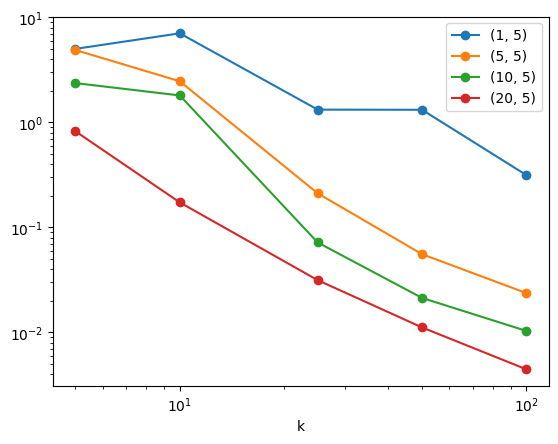

lag 10


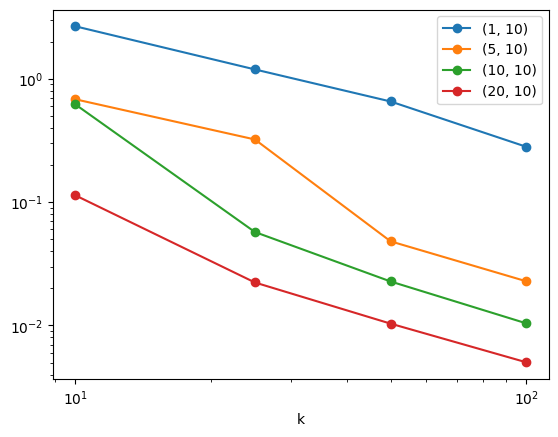

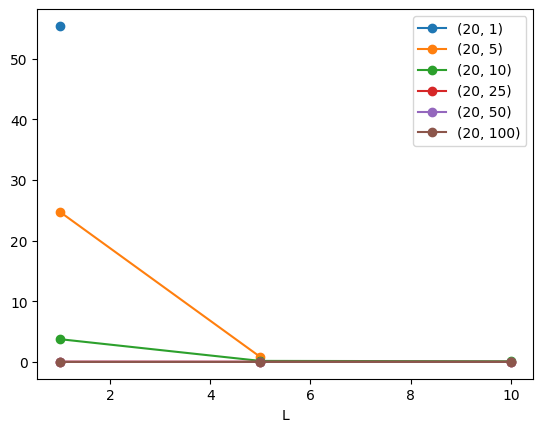

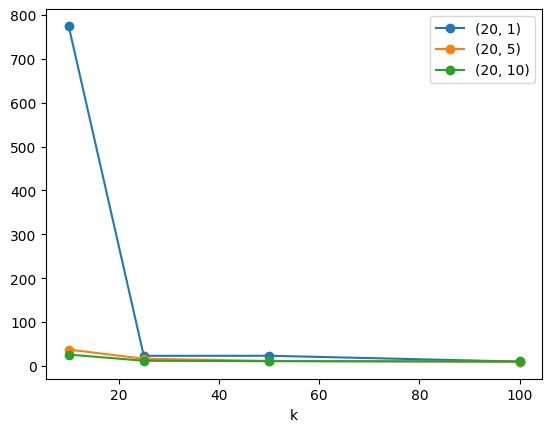

In [201]:
"""
Setup for experiment 1
Analyzing the variance of the unbiased estimators depending on (k, m, lag)
"""

fn_exp1 = "./results/exp_compare_estimators_2.pkl"
with open(fn_exp1, 'rb') as handle:
    exp1 = pickle.load(handle)

"""ks = [1, 5, 10, 25, 50, 100]
m_mults = [1, 2, 5, 10, 20]
lags = [1, 5, 10]"""

ks = [1, 5, 10, 25, 50, 100]
m_mults = [1, 5, 10, 20]
lags = [1, 5, 10]

"""
Plot w.r.t to k, for each lag, and for different m_mult, 
the variance of the unbiased estimator
"""
for lag in lags:
    print("lag", lag)
    for m_mult in m_mults:
        plt.loglog(ks, [np.var(exp1[k][m_mult*k][lag][1]) if lag <= k else None for k in ks], label=(m_mult, lag), marker='o')
    plt.xlabel("k")
    plt.legend()
    plt.show()    

"""
Save the previous result to csv
"""
for lag in lags:
    rows = [ks] +  [[float(np.var(exp1[k][m_mult*k][lag][1])) if lag <= k else -100. for k in ks] for m_mult in m_mults]
    np.savetxt(f"var_estimate_lag_{lag}.csv", np.array(rows).T, comments="", header="k,"+",".join([str(m_mult) for m_mult in m_mults]), delimiter = ", ")
"""
Plot w.r.t to lag, for different k and m_mult,
the variance of the unbiased estimator
"""
m_mults = [m_mults[-1]]
for k in ks:
    for m_mult in m_mults:
        plt.plot(lags, [np.var(exp1[k][m_mult*k][lag][1]) if lag <= k else None for lag in lags], label=(m_mult, k), marker='o')
plt.xlabel("L")
plt.legend()
plt.show()


"""
Plot inefficiency w.r.t to k for different lag and m_mult
"""
ks = [10, 25, 50, 100]
for m_mult in m_mults:
    for lag in lags:
        plt.plot(ks, [np.var(exp1[k][m_mult*k][lag][1])*np.mean(lag + 2 * (exp1[k][m_mult*k][lag][-1]-1) + np.maximum(1, m_mult * k - exp1[k][m_mult*k][lag][-1]+1)) if lag <= k else None for k in ks], label=(m_mult, lag), marker='o')
plt.xlabel("k")
plt.legend()
plt.show()

In [196]:
"k,"+",".join([str(m_mult) for m_mult in m_mults])

'k,1,5,10,20'

In [197]:
rows

[[1, 5, 10, 25, 50, 100],
 [None,
  50.18339920043945,
  53.83024215698242,
  41.01377487182617,
  22.36639976501465,
  0.2452390193939209],
 [None,
  21.873699188232422,
  6.35142183303833,
  1.7411725521087646,
  0.04926302284002304,
  0.03294580057263374],
 [None,
  27.00953483581543,
  20.050363540649414,
  1.2528948783874512,
  0.11407861858606339,
  0.010635064914822578],
 [None,
  24.73488998413086,
  3.7524595260620117,
  0.04520001262426376,
  0.022915901616215706,
  0.004844621755182743]]

[[1, 5, 10, 25, 50, 100],
 [87.56087493896484,
  50.18339920043945,
  53.83024215698242,
  41.01377487182617,
  22.36639976501465,
  0.2452390193939209],
 [58.1193733215332,
  21.873699188232422,
  6.35142183303833,
  1.7411725521087646,
  0.04926302284002304,
  0.03294580057263374],
 [62.78596878051758,
  27.00953483581543,
  20.050363540649414,
  1.2528948783874512,
  0.11407861858606339,
  0.010635064914822578],
 [55.37724304199219,
  24.73488998413086,
  3.7524595260620117,
  0.04520001262426376,
  0.022915901616215706,
  0.004844621755182743]]

In [184]:
[[float(np.var(exp1[k][m_mult*k][1][1])) for m_mult in m_mults] for k in ks]

[[87.56087493896484, 58.1193733215332, 62.78596878051758, 55.37724304199219],
 [50.18339920043945, 21.873699188232422, 27.00953483581543, 24.73488998413086],
 [53.83024215698242, 6.35142183303833, 20.050363540649414, 3.7524595260620117],
 [41.01377487182617,
  1.7411725521087646,
  1.2528948783874512,
  0.04520001262426376],
 [22.36639976501465,
  0.04926302284002304,
  0.11407861858606339,
  0.022915901616215706],
 [0.2452390193939209,
  0.03294580057263374,
  0.010635064914822578,
  0.004844621755182743]]

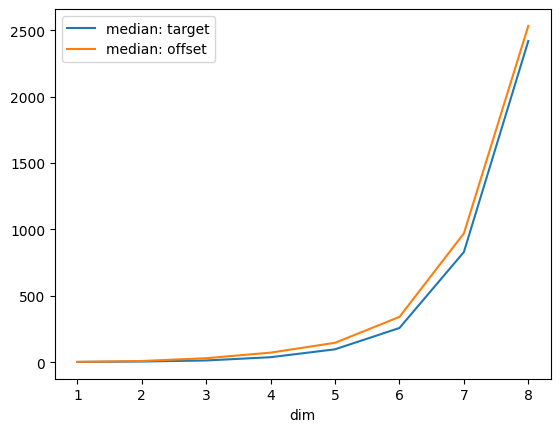

Mean (target): 3.80400013923645
Mean (offset): 4.343000411987305


ValueError: Quantiles must be in the range [0, 1]

In [179]:
"""
Setup for experiment 2
Analyzing the histogram of the meeting times depending on the dimension
"""

fn_exp2 = ["./results/results_coupling_time_target_wrt_to_dim.pkl", "./results/results_coupling_time_offset_wrt_to_dim.pkl"]
with open(fn_exp2[0], 'rb') as handle:
    exp2 = pickle.load(handle)
with open(fn_exp2[1], 'rb') as handle:
    exp2_offset = pickle.load(handle)
    
k = 10
m = 10 * k
lag = 1
dims = [i for i in range(1, 9)]

"""
Plot median of the meeting time
+ Save to csv
"""
median_target = [(np.median(exp2[d][-1])) for d in dims]
median_offset = [(np.median(exp2_offset[d][-1])) for d in dims]
plt.plot(dims, median_target, label="median: target")
plt.plot(dims, median_offset, label="median: offset")
plt.xlabel("dim")
plt.legend()
plt.show()

fields = ["dims", "median_target", "median_offset"]
rows = [[dim, median_target[i], median_offset[i]] for i, dim in enumerate(dims)]
np.savetxt("median_meeting_time_wrt_dim.csv", rows, comments="", header="dim,target,offset", delimiter = ", ")

"""
Plot histograms
"""
for dim in dims:
    print(f"Mean (target): {exp2[dim][-1].mean()}")
    print(f"Mean (offset): {exp2_offset[dim][-1].mean()}")
    print(f"95% quantile (target): {np.quantile(exp2[dim][-1], 95)}")
    print(f"95% quantile (offset): {np.quantile(exp2_offset[dim][-1], 95)}")
    plt.hist(exp2[dim][-1], label="Initial distribution: target", alpha=0.5, bins=10, density=True)
    plt.hist(exp2_offset[dim][-1], label="Initial distribution: offset", alpha=0.5, bins=10, density=True)
    plt.title(f"histogram of the meeting times in dim: {dim}")
    plt.legend()
    plt.show()


In [198]:
rows

[[1, 5, 10, 25, 50, 100],
 [None,
  50.18339920043945,
  53.83024215698242,
  41.01377487182617,
  22.36639976501465,
  0.2452390193939209],
 [None,
  21.873699188232422,
  6.35142183303833,
  1.7411725521087646,
  0.04926302284002304,
  0.03294580057263374],
 [None,
  27.00953483581543,
  20.050363540649414,
  1.2528948783874512,
  0.11407861858606339,
  0.010635064914822578],
 [None,
  24.73488998413086,
  3.7524595260620117,
  0.04520001262426376,
  0.022915901616215706,
  0.004844621755182743]]

Mean (target): 300.91900634765625
95% quantile (target): 875.05


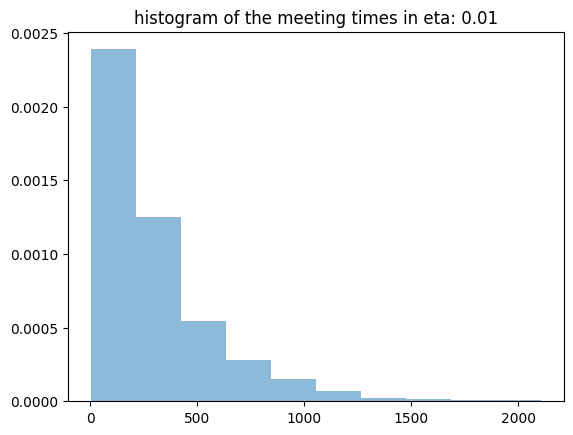

Mean (target): 161.62701416015625
95% quantile (target): 499.04999999999995


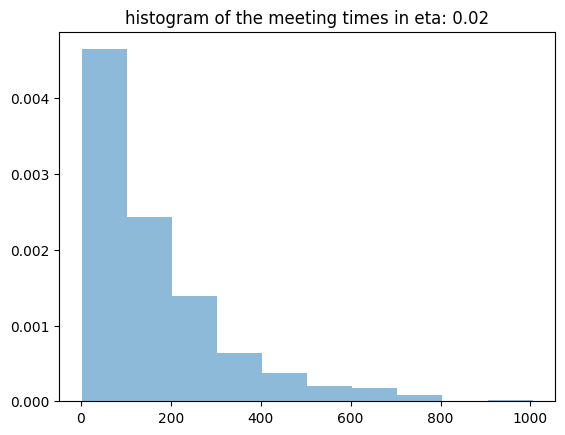

Mean (target): 105.84200286865234
95% quantile (target): 332.0999999999999


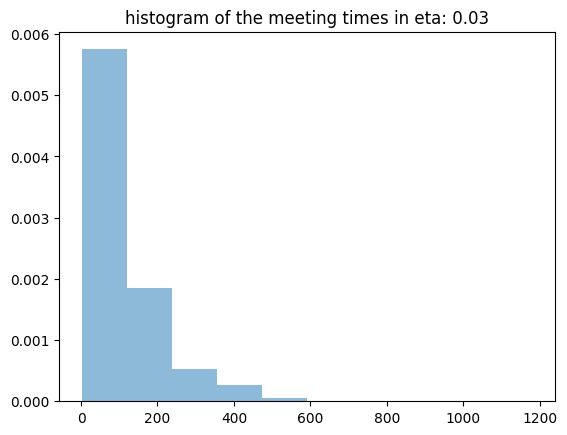

Mean (target): 81.13600158691406
95% quantile (target): 249.04999999999995


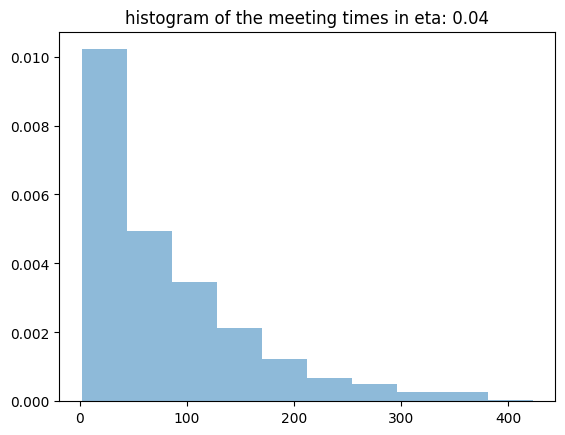

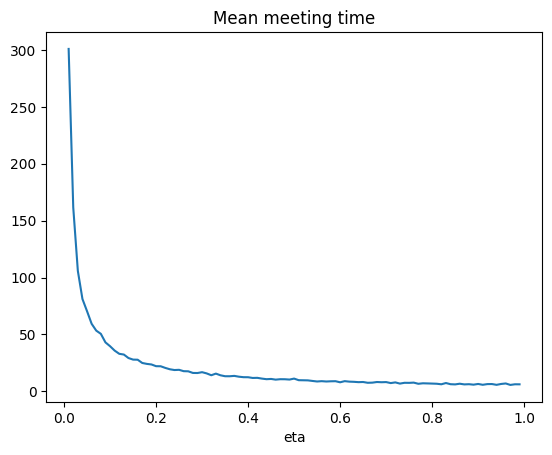

In [45]:
"""
Setup for experiment 3.
Evolution of the meeting time distribution with respect to eta.
"""

fn_exp3 = "./results/results_coupling_time_target_wrt_to_eta_bis.pkl"

with open(fn_exp3, 'rb') as handle:
    exp3 = pickle.load(handle)


etas = [k/100 for k in range(1, 100)]
k = 10
m = 10 * k
lag = 1
dim = 1


for eta in etas[:4]:
    print(f"Mean (target): {exp3[eta][-1].mean()}")
    print(f"95% quantile (target): {np.quantile(exp3[eta][-1], 0.95)}")
    plt.hist(exp3[eta][-1], alpha=0.5, bins=10, density=True)
    plt.title(f"histogram of the meeting times in eta: {eta}")
    plt.show()

plt.plot(etas, [exp3[eta][-1].mean() for eta in etas])
plt.title("Mean meeting time")
plt.xlabel("eta")
plt.show()

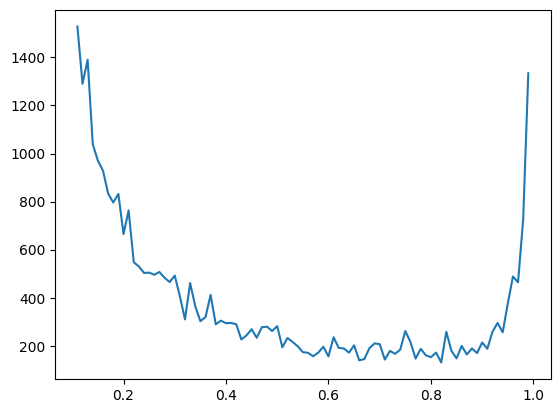

In [112]:
"""
Experiment 3. 
Bound on the variance of the cost
"""
var_etas = [exp3[eta][-1].var() for eta in etas]
mean_etas = [exp3[eta][-1].mean() for eta in etas]
var_costs = 2*np.array(etas)/(1-np.array(etas))*np.array(mean_etas)+np.array(var_etas)
plt.plot(etas[10:], var_costs[10:], label="Bound on the var. of the total cost")


"""
Save to csv
"""
rows = [[eta, var_eta] for eta, var_eta in zip(etas, var_costs)]
np.savetxt("bound_on_the_variance_of_the_total_cost.csv", rows, comments="", header="eta,bound_var_cost", delimiter = ", ")

In [47]:
np.argmin(var_costs)
etas[np.argmin(var_costs)]

0.82